In [1]:
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install fbprophet
except:
  print("Error installing facebook prophet")
finally:
  clear_output()
  print('Facebook Prophet was successfully installed')

Facebook Prophet was successfully installed


In [2]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import datetime as dt
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Loading value_per_acre.csv file from data folder
value_per_acre_df= pd.read_csv("./value_per_acre.csv",
                               parse_dates= True)
value_per_acre_df.tail()

,Unnamed: 0,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
43,2017,3170,NaN,7720,2730,11630,2070,7630,7960,6940,3430,NaN,3570,7210,6300,7440,2010,4140,2700,7630,7050,7630,4580,4920,2900,3560,1010,4430,5829,7630,13600,1560,2740,4090,1890,6150,1590,2920,6470,7630,2700,3200,3730,1850,3690,7630,4730,2660,3250,4870,1460
44,2018,3300,NaN,7610,2780,12170,2100,7650,8120,7040,3430,NaN,3740,7280,6210,7290,2060,4250,2790,7650,7280,7650,4510,4950,3000,3490,1020,4380,5722,7650,13700,1580,2800,4130,1870,6320,1630,3000,6890,7650,2790,3120,3830,1890,3830,7650,4760,2630,3250,4740,1490
45,2019,3430,NaN,7600,2850,12830,2160,7900,8600,7190,3210,NaN,3930,7300,6210,7260,2160,4300,2880,7900,7370,7900,4500,4810,3080,3490,1040,4390,5722,7900,13700,1550,2810,4180,1920,6400,1670,3080,7030,7900,2830,3130,3910,1930,3970,7900,4720,2630,3280,4850,1520
46,2020,3500,NaN,7650,2880,12900,2200,7900,8600,7190,3320,NaN,4070,7300,6210,7170,2080,4400,2930,7900,7380,7900,4480,4800,3100,3530,1030,4360,5722,7900,13800,1600,2800,4180,1930,6460,1690,3120,7100,7900,2830,3030,3990,2030,4040,7900,4680,2610,3270,4770,1540
47,2021,3550,NaN,7700,2930,13860,2240,8770,8600,7300,3480,NaN,4450,7900,6800,7810,2370,4510,2980,8770,7960,8770,4700,5270,3150,3810,1050,4960,5616,8770,14800,1660,2910,4290,2060,6800,1810,3310,7600,8770,2900,3390,4130,2150,4190,8770,4790,2700,3330,5280,1600


In [20]:
# Renaming unnamed column to "Year"
value_per_acre_df=value_per_acre_df.rename(columns={"Unnamed: 0": "Year"})

In [21]:
# Selecting the historcial prices of the farmland in California over the last 20 years
california_df= value_per_acre_df.loc[26:,["Year", "California"]]
california_df.head()

,Year,California
26,2000,5960
27,2001,5870
28,2002,5730
29,2003,5920
30,2004,6020


In [22]:
# Rename the columns to the Prophet model syntax 
california_df = california_df.rename(columns={"Year":"ds", "California":"y"})

# Review the DataFrame
california_df.head()

,ds,y
26,2000,5960
27,2001,5870
28,2002,5730
29,2003,5920
30,2004,6020


In [23]:
# Creating a Prophet model for the price prediction of the farmland in California
model = Prophet()

In [24]:
# Fitting the Prophet model
model.fit(california_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.


In [25]:
# Forecast 10 years of farmland prices in California
future_farmland_prices_california = model.make_future_dataframe(periods=62, freq="Y")

# Display the last five rows of the DataFrame
future_farmland_prices_california.tail()

,ds
79,2027-12-31 00:00:00.000002021
80,2028-12-31 00:00:00.000002021
81,2029-12-31 00:00:00.000002021
82,2030-12-31 00:00:00.000002021
83,2031-12-31 00:00:00.000002021


In [26]:
# Making predictions using the future_farmland_prices DataFrame
forecast_farmland_prices_california = model.predict(future_farmland_prices_california)

# Display the first five rows of the forecast_canada DataFrame
forecast_farmland_prices_california.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:00:00.000002000,-8746.896504,-6066.646488,-4304.057867,-8746.896504,-8746.896504,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,0.0,0.0,0.0,-5139.729519
1,1970-01-01 00:00:00.000002001,-8746.896504,-5971.493624,-4233.911172,-8746.896504,-8746.896504,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,0.0,0.0,0.0,-5139.729519
2,1970-01-01 00:00:00.000002002,-8746.896504,-6025.012546,-4291.152398,-8746.896504,-8746.896504,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,0.0,0.0,0.0,-5139.729519
3,1970-01-01 00:00:00.000002003,-8746.896504,-5942.313114,-4304.974355,-8746.896504,-8746.896504,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,0.0,0.0,0.0,-5139.729519
4,1970-01-01 00:00:00.000002004,-8746.896504,-5902.494532,-4288.760890,-8746.896504,-8746.896504,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,0.0,0.0,0.0,-5139.729519


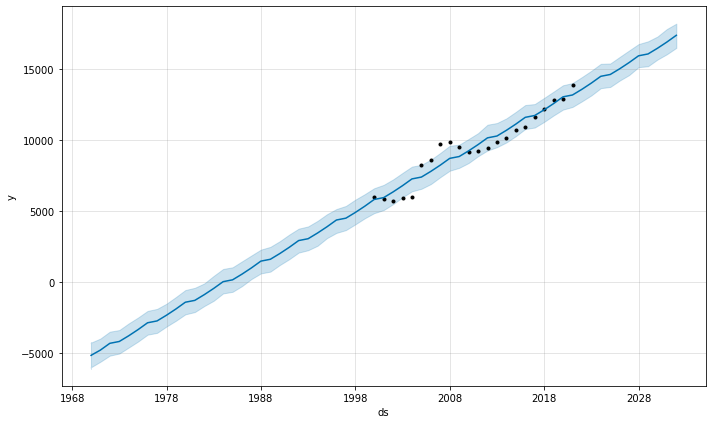

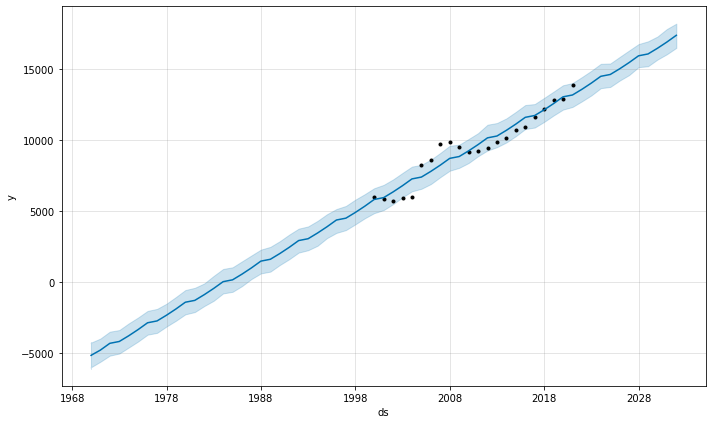

In [27]:
# Ploting the Prophet predictions  
model.plot(forecast_farmland_prices_california)

In [28]:
# Setting the index in the forecast_farmland_prices_california DataFrame to the ds datetime column 
forecast_farmland_prices_california = forecast_farmland_prices_california.set_index('ds')

# Display the forecast_canada DataFrame
forecast_farmland_prices_california.head()




,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002000,-8746.896504,-6066.646488,-4304.057867,-8746.896504,-8746.896504,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,0.0,0.0,0.0,-5139.729519
1970-01-01 00:00:00.000002001,-8746.896504,-5971.493624,-4233.911172,-8746.896504,-8746.896504,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,0.0,0.0,0.0,-5139.729519
1970-01-01 00:00:00.000002002,-8746.896504,-6025.012546,-4291.152398,-8746.896504,-8746.896504,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,0.0,0.0,0.0,-5139.729519
1970-01-01 00:00:00.000002003,-8746.896504,-5942.313114,-4304.974355,-8746.896504,-8746.896504,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,0.0,0.0,0.0,-5139.729519
1970-01-01 00:00:00.000002004,-8746.896504,-5902.494532,-4288.760890,-8746.896504,-8746.896504,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,0.0,0.0,0.0,-5139.729519


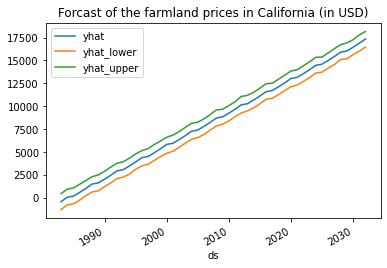

In [29]:
# Plot predictions for our forecast_famrland_prices_california DataFrame for the 10 year period 
forecast_farmland_prices_california[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-50:,:].plot(title= "Forcast of the farmland prices in California (in USD)")



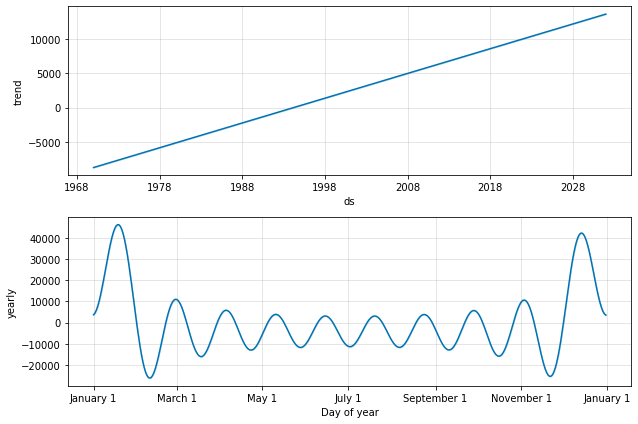

In [30]:
# Reseting the index in the forecast_farmland_prices_california DataFrame
forecast_farmland_prices_california = forecast_farmland_prices_california.reset_index()

# Using the plot_components function to visualize the forecast results 

fig = model.plot_components(forecast_farmland_prices_california)